In [1]:
import queryer
import numpy as np

In [2]:
egdata = queryer.get_earthquake_eager()

In [3]:
egdata[0]

{'data': [{'stationlat': '53.4064',
   'stationlon': '6.4817',
   'ts': array([-109, -154,  -17, ..., -121,  -61,   55])},
  {'stationlat': '53.4064',
   'stationlon': '6.4817',
   'ts': array([ -29, -138,   13, ..., -106,  -72,  110])},
  {'stationlat': '53.4064',
   'stationlon': '6.4817',
   'ts': array([ 285, -149, -383, ...,  140, -330, -196])},
  {'stationlat': '53.4064',
   'stationlon': '6.4817',
   'ts': array([-147, -250, -178, ..., -194, -220, -104])},
  {'stationlat': '52.8944',
   'stationlon': '6.6337',
   'ts': array([-262, -217, -120, ..., -280, -183, -152])},
  {'stationlat': '52.8944',
   'stationlon': '6.6337',
   'ts': array([ -82, -100,   11, ..., -140,  -73,   16])},
  {'stationlat': '52.8944',
   'stationlon': '6.6337',
   'ts': array([-787, -448,  456, ..., -801,   80,  455])},
  {'stationlat': '52.8944',
   'stationlon': '6.6337',
   'ts': array([-318, -296,   88, ..., -374,  -94,  153])},
  {'stationlat': '53.2562',
   'stationlon': '5.5481',
   'ts': array([ 

In [4]:
print([k for k in egdata[0]])# for one earthquake here are the dictionary keys

['eventid', 'eventlat', 'eventlon', 'magnitude', 'data']


# TODO #
1) Write a function which takes a portion of every time series for an earthquake and returns a single 2d 'image'


In [75]:
def tile_creater(manytimeseries,slicelen =1, metric = np.max):
    """manytimeseries is a list of dictionaries
    like so {'stationlat': , 'stationlon':, 'ts':numpy array}
    we need to calculate the metric for each one, and then place
    each metric in a 2d grid according to its latitude and longitude
    metric is a function that operates on a 2d array, and returns """
    #dataarray = np.asarray([i['data'] for i in manytimeseries])#a n rows by t columns array where n is the num sensors
    dataarray = np.zeros((len(manytimeseries),manytimeseries[0]['ts'].size))
    i=0
    for stationdata in manytimeseries:
        dataarray[i,0:stationdata['ts'].size] = np.array(stationdata['ts'])
        i+=1
    
    metrics = slicecalcer(dataarray, slicelen, metric) #now columns are a metric of each slice of the original,
    #and rows still correspond with an individual sensor each. now for each column create a tile. something
    #like
    stationdeets = np.asarray([[i.get('stationlat'),i.get('stationlon')]
                                for i in manytimeseries])
    tiles = [singletile(metrics[:,idx], stationdeets)
             for idx in range(np.shape(metrics)[1])]
    return tiles
def singletile(metricslice, stationdeets):
    """create a tile from a column metricslice which has the metric value for
    #each station for r a given time slice. stationdeets is another numpy array
    which is n rows x 2, where each row is the lat, lon of the station at the corresponding
    row in metricslice:
    """
    #metricslice is a column array that has the metric of choice for a given timeslice for each statation
    #stationdeets is nx2 matrix that has the lat lon values of the stations
    
    #create an emtyp grid wirth size/resolution x size/resolution dimensions
    grid = np.zeros((size/resolution,size/resolution))
    #1 figure out where that station stands on the discretized grid (lat,lon)->(m,n)
    stationlat,stationlon = np.asfarray([stationdeets[i,:] for i in range(stationdeets.shape[0])],float).T
    x,y = grid_translation(topleft,0.65,details,)
    print(stationlat, stationlon)
    #2 value of slice(m,n) = metricslice(val for that stations) #n:column index, #m:row index
    x,y = np.asarray([grid_translation(topleft,0.65,lat[i],lon[i]) for i in range(lat.shape[0])]).T
    n,m = np.asarray([discretiser(size, resolution, x[i],y[i]) for i in range(x.shape[0])]).T

    """Return -> A 2d numpy array tile"""
    pass
def slicecalcer(dataarray, slicelen, metric):
    n,t=np.shape(dataarray)
    slice_steps = np.arange(0,t+1,slicelen)
    slices = [dataarray[:,i[0]:i[1]] for i in zip(slice_steps, slice_steps[1::])]
    
    metrics = np.asarray([metric(arr, axis=1) for arr in slices]).T
    return metrics
#probably best to create another function which returns grid values which we will use in tile_creater
#assuming we will use a square for now, can always change later
def grid_translation(topleft,size, stationlat, stationlon):
    """Args: 
    topleft is a tuple of the (lat, lon) of the most NW part of our grid
    size is the length in metres of the side of our grid (e.g 100,000)
    stationlat,stationlon are the coordinates of the location we want translated
    """
    lon_ref = topleft[0]
    lat_ref = topleft[1]
    
    #dx = (lon2-lon1)*40000*math.cos((lat1+lat2)*math.pi/360)/360 *1000
    #dy = (lat1-lat2)*40000/360 *1000
    dx = (stationlon-lon_ref)
    dy = (lat_ref-stationlat)
    return (dx,dy)
    
    """
    Returns:
    (x,y) real valued x,y coordinates where 0<x<size, 0<y<size"""
    #pass
def discretiser(size, resolution, x,y):
    """Args: 
    size is the length in metres of the side of our grid (e.g 100,000)
    resolution is the size of the side of one pixel in the grid e.g. 100m
    (x,y) real valued x,y coordinates where 0<x<size, 0<y<size
    Returns:
    (n,m) where n,m are integer valued pixel numbers e.g. (102,88)"""
    n = int(x/resolution)
    m = int(y/resolution)
    return (n,m)

    #pass

In [8]:
a = np.asarray([range(6) for i in range(5)])
print(a)
print(type(a))

[[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]]
<class 'numpy.ndarray'>


53.4064
<class 'numpy.ndarray'>
209
['53.4064' '6.4817']
209
(209,)
range(0, 209)
<class 'numpy.ndarray'>
(209, 240)


49.0
143.0
<class 'numpy.ndarray'>
(100, 100)
8133.0 8133.0


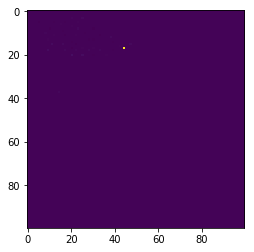

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [144]:
def tile_creater(manytimeseries,slicelen =1, metric = np.max):
    """manytimeseries is a list of dictionaries
    like so {'stationlat': , 'stationlon':, 'ts':numpy array}
    we need to calculate the metric for each one, and then place
    each metric in a 2d grid according to its latitude and longitude
    metric is a function that operates on a 2d array, and returns """
    #dataarray = np.asarray([i['data'] for i in manytimeseries])#a n rows by t columns array where n is the num sensors
    dataarray = np.zeros((len(manytimeseries),manytimeseries[0]['ts'].size))
    i=0
    for stationdata in manytimeseries:
        dataarray[i,0:stationdata['ts'].size] = np.array(stationdata['ts'])
        i+=1
    
    metrics = slicecalcer(dataarray, slicelen, metric) #now columns are a metric of each slice of the original,
    #and rows still correspond with an individual sensor each. now for each column create a tile. something
    #like
    stationdeets = np.asarray([[i.get('stationlat'),i.get('stationlon')]
                                for i in manytimeseries])
#     tiles = [singletile(metrics[:,idx], stationdeets)
#              for idx in range(np.shape(metrics)[1])]
    print(stationdeets[1,0])
    return stationdeets

manytimeseries = egdata[0]['data']
dataarray = np.zeros((len(manytimeseries),manytimeseries[0]['ts'].size))
i=0
for stationdata in manytimeseries:
    dataarray[i,0:stationdata['ts'].size] = np.array(stationdata['ts'])
    i+=1
slicelen =100
metric = np.max
metrics = slicecalcer(dataarray, slicelen, metric)
    
#print(manytimeseries)
stationdeets = tile_creater(manytimeseries)
print(type(stationdeets))
print(stationdeets.shape[0])
print(stationdeets[0,:])

lat,lon = np.asarray([stationdeets[i,:] for i in range(stationdeets.shape[0])],float).T
topleft = np.asarray([6.4,53.50])
print(lat.shape[0])

resolution = 1.60/100
size = 1.6

slice_grid = np.zeros((int(size/resolution),int(size/resolution)))

x,y = np.asarray([grid_translation(topleft,0.65,lat[i],lon[i]) for i in range(lat.shape[0])]).T
#print((x))
print(x.shape)
print(range(x.shape[0]))

# n = int(x/resolution)
# m = int(y/resolution)
# return (n,m)

#matrix is nxm
n,m = np.asarray([discretiser(size, resolution, x[i],y[i]) for i in range(x.shape[0])]).T
#print(n)
#print(lat.shape)
#print(lon)
print(type(metrics))
print(metrics.shape)
print('\n')
print(metrics[0,0])
print(metrics[1,0])
for station in range(metrics.shape[0]):
    #print(station)
    slice_grid[m[station],n[station]]=metrics[station,0]
    #print(m[station],n[station],metrics[station,0])
    #print('slice_grid:',slice_grid[m[station],n[station]],'\n')
    
print(type(slice_grid))
print(slice_grid.shape)
max_row= np.max(np.max(slice_grid,axis=0))
max_column =np.max(np.max(slice_grid,axis=1))
print(max_row,max_column)
plt.imshow(slice_grid/max_row*255)
plt.show()

slice_grid

In [ ]:
def slicecalcer(dataarray, slicelen, metric):
    n,t=np.shape(dataarray)
    slice_steps = np.arange(0,t+1,slicelen)
    slices = dataarray[:,i[0]:i[1]] for i in zip(slice_steps, slice_steps[1::])]

#     for i in zip(slice_steps, slice_steps[1::]):
#         slices = dataarray[:,i[0]:i[1]] 
#         print(i[0],i[1])
    print(slices)
    
    print(type(slices))
    print(slices.shape)
    metrics = np.asarray([metric(arr, axis=1) for arr in slices]).T
    return metrics

slicecalcer(a, slicelen=3, metric=np.max)

In [ ]:
[(idx, col) for idx, col in enumerate(a.T)]

In [22]:
import matplotlib.pyplot as plt

print(type(egdata))
print(type(egdata[0]))
print(egdata[0]['eventlat'])
print(egdata[0]['eventlon'])

print(type(egdata[1]))
print(egdata[1]['eventlat'])
print(egdata[1]['eventlon'])

print(type(egdata[2]))
print(egdata[2]['eventlat'])
print(egdata[2]['eventlon'])
#print(egdata[0]['stationlat'])

print('\n')

print((egdata[0]['data'][1]['ts']))
trace1=egdata[0]['data'][0]['ts']
trace2=egdata[0]['data'][1]['ts']
trace3=egdata[0]['data'][2]['ts']

plt.plot(trace1[0:50],alpha=0.7)
plt.plot(trace2[0:50],alpha=0.7)
plt.plot(trace3[0:50],alpha=0.7)
plt.show()
print(type(trace1))
t1_mean = np.mean(trace1)
t2_mean = np.mean(trace2)
trace1_n = trace1-t1_mean
trace2_n = trace2-t2_mean

t1_max = np.max(trace1)
t2_max = np.max(trace2)
trace1_nm =trace1_n/t1_max
trace2_nm = trace2_n/t2_max

plt.plot(trace1_nm[0:1000],alpha=0.7)
plt.plot(trace2_nm[0:1000],alpha=0.7)
plt.show()


<class 'list'>
<class 'dict'>
53.122
6.943
<class 'dict'>
53.223
6.949
<class 'dict'>
53.314
6.861


[ -29 -138   13 ... -106  -72  110]


<class 'numpy.ndarray'>


In [ ]:
print((egdata[0]['data'][1]['stationlat']))
egdata[0]

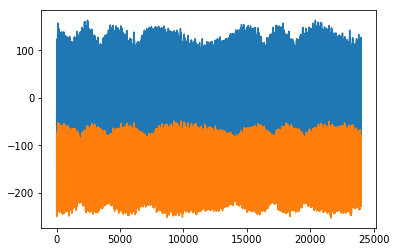

<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
53.44901 7.1195
52.8944 5.5481
0.5546100000000038 1.5714000000000006


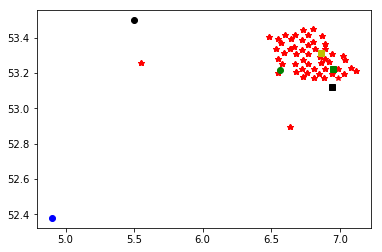

In [140]:
plt.plot(egdata[0]['data'][1]['ts'])
plt.plot(egdata[0]['data'][3]['ts'])
plt.show()

# for k in range(len(egdata[0]['data'])):
#     print(egdata[0]['data'][k]['stationlon'])
#     #print(k)
for k in range(len(egdata[0]['data'])):
    #print(type(egdata[0]['data'][0]['stationlat']))
    plt.plot(float(egdata[0]['data'][k]['stationlon']),float(egdata[0]['data'][k]['stationlat']),'r*')

all_lat = np.asfarray([(egdata[0]['data'][station]['stationlat']) for station in range(len(egdata[0]['data']))],float)
all_lon = np.asfarray([(egdata[0]['data'][station]['stationlon']) for station in range(len(egdata[0]['data']))],float)
print(type(all_lat))
print(type(all_lat[1]))
#print(all_lat)
print(type(all_lon))
print(type(all_lon[1]))

max_lat = np.max(all_lat)
min_lat = np.min(all_lat)

max_lon = np.max(all_lon)
min_lon = np.min(all_lon)
print(max_lat,max_lon)
print(min_lat,min_lon)
del_lat = max_lat-min_lat
del_lon = max_lon-min_lon
print(del_lat,del_lon)

plt.plot([4.899431],[52.379189],'bo')
plt.plot([6.5665018],[53.2193835],'go')
plt.plot(float(egdata[0]['eventlon']),float(egdata[0]['eventlat']),'ks')
plt.plot(float(egdata[1]['eventlon']),float(egdata[1]['eventlat']),'gs')
plt.plot(float(egdata[2]['eventlon']),float(egdata[2]['eventlat']),'ys')

topleft = np.asarray([5.50,53.50])
resolution = 0.65/1000
plt.plot(topleft[0],topleft[1],'ko')
plt.show()


In [ ]:
print(range(3))

In [ ]:
import math

lon1 = float(egdata[0]['data'][0]['stationlon'])
lat1 = float(egdata[0]['data'][0]['stationlat'])

lon2 = float(egdata[0]['data'][4]['stationlon'])
lat2 = float(egdata[0]['data'][4]['stationlat'])

lon2 = lon1
lat2 = lat1+1

dx = (lon2-lon1)*40000*math.cos((lat1+lat2)*math.pi/360)/360
dy = (lat1-lat2)*40000/360

print(dx,dy)

In [ ]:
def discretiser(size, resolution, x,y):
    """Args: 
    size is the length in metres of the side of our grid (e.g 100,000)
    resolution is the size of the side of one pixel in the grid e.g. 100m
    (x,y) real valued x,y coordinates where 0<x<size, 0<y<size
    Returns:
    (n,m) where n,m are integer valued pixel numbers e.g. (102,88)"""    
    
    n = int(x/resolution)
    m = int(y/resolution)
    return (n,m)

size = 10
resolution = 1
n,m = discretiser(size,resolution,10.1,10.1)
print(n,m)

In [ ]:
def tile_creater(manytimeseries,slicelen =1000, metric = np.max):
    """manytimeseries is a list of dictionaries
    like so {'stationlat': , 'stationlon':, 'ts':numpy array}
    we need to calculate the metric for each one, and then place
    each metric in a 2d grid according to its latitude and longitude
    metric is a function that operates on a 2d array, and returns """
    dataarray = np.asarray([i['data'] for i in manytimeseries])#a n rows by t columns array where n is the num sensors
    
    metrics = slicecalcer(dataarray, slicelen, metric) #now columns are a metric of each slice of the original,
    #and rows still correspond with an individual sensor each. now for each column create a tile. something
    #like
    stationdeets = np.asarray([[i.get('stationlat'),i.get('stationlon')]
                                for i in manytimeseries])
    
    tiles = [singletile(metrics[:,idx], stationdeets)
             for idx in range(np.shape(metrics)[1])]
    return tiles
#################################################################

manytimeseries = egdata[0]['data']
#print((manytimeseries))
print(len(manytimeseries))


dataarray = np.zeros((len(manytimeseries),manytimeseries[0]['ts'].size))
print(manytimeseries[0]['ts'].size)

i=0
for stationdata in manytimeseries:
    dataarray[i,0:stationdata['ts'].size] = np.array(stationdata['ts'])
    i+=1
    #print(stationdata['stationlon'])
    #print(stationdata['ts'].size)
    
n,t=np.shape(dataarray)
print(n,t)
slicelen=5
slice_steps = np.arange(0,t+1,slicelen)
for i in zip(slice_steps, slice_steps[1::]):
    slices = dataarray[:,i[0]:i[1]]
    #print(i[1])


print('arr\n')
for arr in slices:
    print(arr)
    print(type(arr))
              
print(si)
metrics = np.asarray([np.max(arr, axis=1) for arr in slices]).T



In [ ]:
manytimeseries = egdata[0]['data']
def tile_creater(manytimeseries,slicelen =1000, metric = np.max):
    """manytimeseries is a list of dictionaries
    like so {'stationlat': , 'stationlon':, 'ts':numpy array}
    we need to calculate the metric for each one, and then place
    each metric in a 2d grid according to its latitude and longitude
    metric is a function that operates on a 2d array, and returns """
    #dataarray = np.asarray([i['data'] for i in manytimeseries])#a n rows by t columns array where n is the num sensors
    
    dataarray = np.zeros((len(manytimeseries),manytimeseries[0]['ts'].size))
    i=0
    for stationdata in manytimeseries:
        dataarray[i,0:stationdata['ts'].size] = np.array(stationdata['ts'])
        i+=1
        
    #metrics = slicecalcer(dataarray, slicelen, metric) #now columns are a metric of each slice of the original,
    metrics = slicecalcer(dataarray,slicelen,metric)
    
    #and rows still correspond with an individual sensor each. now for each column create a tile. something
    #like
   # stationdeets = np.asarray([[i.get('stationlat'),i.get('stationlon')]
    #                            for i in manytimeseries])
    
    #tiles = [singletile(metrics[:,idx], stationdeets)
    #         for idx in range(np.shape(metrics)[1])]
    #return tiles


    return metrics

tiles = tile_creater(manytimeseries)
print(tiles.shape)